## Week 2 Project 1:
## CUNY MSDS DATA620 - Web Analytics
---
### Team5: Christopher Estevez, Meaghan Burke, Rickidon Singh,  Ritesh Lohiya, Rose Koh
### 06/25/2018 (due date)
##### python version: 2.7
---

## Degree and Eigenvector centrality

For your first project, you are asked to

    1.	Identify and load a network dataset that has some categorical information available for each node.
	2.	For each of the nodes in the dataset, calculate degree centrality and eigenvector centrality.
	3.	Compare your centrality measures across your categorical groups.

For example, using the dataset from a study of romantic relationships among high school students in Columbus, Ohio [http://researchnews.osu.edu/archive/chains.html], you might want to determine if there are any differences in your calculated centrality measures between the two sexes.  You might use a t-test or another statistical measure to support your findings.

You may work in a small group.  Your project should be delivered in an IPython Notebook, and posted in GitHub.  Your project is due end of day Monday 6/25. You and your team should created a video presentation about your project. You should be ready to present your project in our Meet-up on Tuesday, June 26th. 

## 1. Identify Data:

The group identified data at source: `http://www-personal.umich.edu/~mejn/netdata/`.

The **Books about US politics** dataset has the capacity for centrality metrics as well as a good amount of categorical data for nodes.

Each nodes has value of `l,n,c` which is `liberal, neutral, conservative`


## 2. Load & explore the data.

In [252]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
style.use('fivethirtyeight')
%matplotlib inline

In [253]:
G = nx.read_gml("data/polbooks/polbooks.gml")

#### A) Dimensions of the loaded network.
- Counts of nodes & edges
- maximum diameter of the network

In [254]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 105
Number of edges: 441
Average degree:   8.4000


In [255]:
nx.diameter(G)

7

#### B) Exploration of categorical data.
- Loop through nodes and extract the political orientation of the books 
- Summarize the political landscape 

In [256]:
node_df = pd.DataFrame(list(G.nodes(data = True)))
node_df.rename(columns= {0:'Nodes', 1: 'Values'}, inplace = True)
node_df['Political_View'] = ''
dict_view  = { 'l':'Liberal',
             'c': 'Conservative',
             'n': 'Neutral'}
for x in range(len(node_df['Values'])):
    pol_view = node_df['Values'][x]['value'] 
    node_df['Political_View'][x] = dict_view[pol_view]
node_df.drop(['Values'], axis =1, inplace = True)

In [257]:
node_df.groupby(['Political_View']).count().reset_index()

,Political_View,Nodes
0,Conservative,49
1,Liberal,43
2,Neutral,13


## 3. Calculate degree centrality and eigenvector centrality.

#### A) Degree: the number of edges adjacent to each node.
 - Apply .degree() to each node 
 - Merge node metadata 
 - Display top 10 nodes 
 - Group connection by political view 

In [258]:
degree_values =[]
for d in G.degree():
    degree_values.append(d)
degree_centrality = pd.DataFrame(degree_values)
degree_centrality.rename(columns ={0:'Nodes', 1: 'Connection_Num'}, inplace = True)
degree_centrality = degree_centrality.merge(node_df, how = 'left', on = ['Nodes'])

In [259]:
degree_centrality.sort_values(['Connection_Num'], ascending= False).head(10)

,Nodes,Connection_Num,Political_View
34,Off with Their Heads,25,Conservative
70,A National Party No More,25,Conservative
23,Losing Bin Laden,23,Conservative
30,Bushwhacked,23,Liberal
99,American Dynasty,22,Liberal
75,The Great Unraveling,21,Liberal
38,Big Lies,21,Liberal
9,The Price of Loyalty,20,Liberal
1,Arrogance,18,Conservative
42,Legacy,18,Conservative


In [260]:
degree_centrality.groupby(['Political_View']).sum().reset_index()

,Political_View,Connection_Num
0,Conservative,426
1,Liberal,380
2,Neutral,76


#### B) Degree Centrality:  the fraction of nodes it is connected to a particular node
 - Apply nx.degree_centrality() to each node 
 - Merge node metadata 
 - Display top 10 nodes 
 - Group connection by political view for mean centrality degree

In [261]:
degree_c = nx.degree_centrality(G)
degree_c_df = pd.DataFrame([degree_c.values()], columns=degree_c.keys()).reset_index()
degree_c_df = degree_c_df.sort_values(by=0, ascending=False, axis=1).T.reset_index()
degree_c_df.rename(columns ={'index':'Nodes', 0: 'Centrality Degree'}, inplace = True)
degree_c_df= degree_c_df.merge(node_df, how = 'left', on = ['Nodes'])
degree_c_df.head(10)

,Nodes,Centrality Degree,Political_View
0,A National Party No More,0.240385,Conservative
1,Off with Their Heads,0.240385,Conservative
2,Losing Bin Laden,0.221154,Conservative
3,Bushwhacked,0.221154,Liberal
4,American Dynasty,0.211538,Liberal
5,The Great Unraveling,0.201923,Liberal
6,Big Lies,0.201923,Liberal
7,The Price of Loyalty,0.192308,Liberal
8,Legacy,0.173077,Conservative
9,Deliver Us from Evil,0.173077,Conservative


In [262]:
degree_c_df.groupby(['Political_View']).mean().sort_values('Centrality Degree', ascending = False).reset_index()

,Political_View,Centrality Degree
0,Liberal,0.084973
1,Conservative,0.083595
2,Neutral,0.056213


#### c) Eigenvector centrality: computes the centrality for a node based on the centrality of its neighbors. 
  - Apply  nx.eigenvector_centrality_numpy() to each node 
  - Merge node metadata 
  - Display top 10 nodes 
  - Group connection by political view for mean eigenvector centrality degree

In [263]:
eigenvector_c = nx.eigenvector_centrality_numpy(G)
eigen_c_df = pd.DataFrame([eigenvector_c.values()], columns=eigenvector_c.keys())
eigen_c_df = eigen_c_df.sort_values(by=0, ascending=False, axis=1).T.reset_index()
eigen_c_df.rename(columns ={'index':'Nodes', 0: 'Eigenvector Centrality'}, inplace = True)
eigen_c_df= eigen_c_df.merge(node_df, how = 'left', on = ['Nodes'])
eigen_c_df.head(10)

,Nodes,Eigenvector Centrality,Political_View
0,Bushwhacked,0.296946,Liberal
1,Big Lies,0.284135,Liberal
2,American Dynasty,0.270838,Liberal
3,The Price of Loyalty,0.258594,Liberal
4,The Great Unraveling,0.254886,Liberal
5,The Lies of George W. Bush,0.241950,Liberal
6,Worse Than Watergate,0.237598,Liberal
7,Plan of Attack,0.198185,Neutral
8,Lies and the Lying Liars Who Tell Them,0.189236,Liberal
9,Against All Enemies,0.186726,Liberal


In [264]:
eigen_c_df.groupby(['Political_View']).mean().sort_values('Eigenvector Centrality', ascending = False).reset_index()

,Political_View,Eigenvector Centrality
0,Liberal,0.117151
1,Neutral,0.038171
2,Conservative,0.037308


## 4. Draw network.

In [265]:
# for each node in the graph
node_color = []
for node in G.nodes(data=True):
    pol_view = node[1]['value']
    if pol_view == 'c':
        node_color.append('red')
    elif pol_view == 'l':
        node_color.append('blue')
    elif pol_view == 'n':
        node_color.append('green')


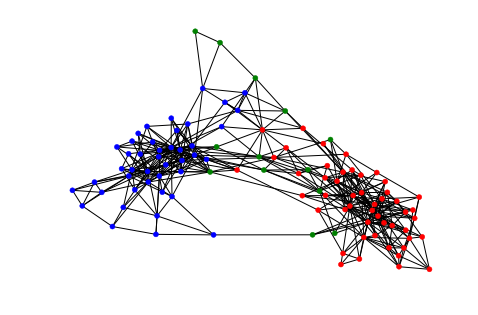

In [266]:
nx.draw(G, with_labels = False, node_size = 25,node_color=node_color)
plt.show()
plt.savefig("graph.png", dpi=500)